### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [2]:
!pip install -U tensorflow==2

Requirement already up-to-date: tensorflow==2 in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
import tensorflow as tf

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [30]:
train_x.shape

(60000, 28, 28)

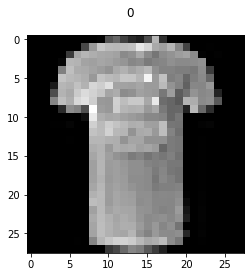

In [31]:
#Lets print the image as well
import matplotlib.pyplot as plt

img_num = np.random.randint(0,test_x.shape[0])
plt.imshow(test_x[img_num],cmap='gray')
plt.suptitle(str(test_y[img_num]))
plt.show()

#### Change train and test labels into one-hot vectors

In [0]:
trainY = tf.keras.utils.to_categorical(train_y, num_classes=10)
testY = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [33]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
# clear out tensorflow memory
tf.keras.backend.clear_session()

In [0]:
model = tf.keras.models.Sequential()

In [0]:
#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))

In [0]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
# Adding 1st layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [0]:
# model.add(tf.keras.layers.Dropout(0.25))

In [0]:
# Adding 2nd layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
# Adding a dropout layer
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
# Adding Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

In [45]:
model.fit(train_x,trainY,
          validation_data=(test_x,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5114 - acc: 0.8174 - val_loss: 0.4041 - val_acc: 0.8537
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4002 - acc: 0.8531 - val_loss: 0.3920 - val_acc: 0.8565
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3602 - acc: 0.8667 - val_loss: 0.3621 - val_acc: 0.8698
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3374 - acc: 0.8767 - val_loss: 0.3551 - val_acc: 0.8783
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3159 - acc: 0.8841 - val_loss: 0.3593 - val_acc: 0.8747
Epoch 6/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2995 - acc: 0.8879 - val_loss: 0.3568 - val_acc: 0.8774
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2880 - acc: 0.8929 - val_loss: 0.

In [0]:
input_data = np.expand_dims(test_x[0], axis=0)

In [47]:
input_data

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [48]:
input_data.shape

(1, 28, 28)

In [49]:
pred = model.predict(input_data)
pred

array([[5.8012178e-13, 1.4374776e-17, 1.0359636e-12, 7.2218257e-13,
        1.0911862e-12, 2.6906539e-05, 6.5909414e-13, 1.0012526e-04,
        1.5488856e-10, 9.9987292e-01]], dtype=float32)

In [50]:
np.max(pred)

0.9998729

In [51]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)